<a href="https://colab.research.google.com/github/Marcozambeli/General/blob/main/Trabalho_2_EST_SE_Marco_Antonio_Zambeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ENE057A - Estabilidade em Sistemas Elétricos de Potência Módulo 1 - Geradores Síncronos
###Trabalho 2 - Marco Antonio de O. Zambeli 201369026c

Instruções:

• Data de submissão: 18/02/2021

• Resolução do trabalho deve ser individual submetida via Google Classroom.

• A resolução deve ser realizada em um notebook do Google Colab,

• Os tanto o raciocínio como os resultados dos cálculos devem ser devidamente explicados e comentados.





###1. Seja o gerador de 144,6 [MVA], 18 [kV] e 60 [Hz] cujos parâmetros elétricos e mecânicos estão relacionados abaixo. Valores por unidade são baseados na potência e tensão nominais da máquina.
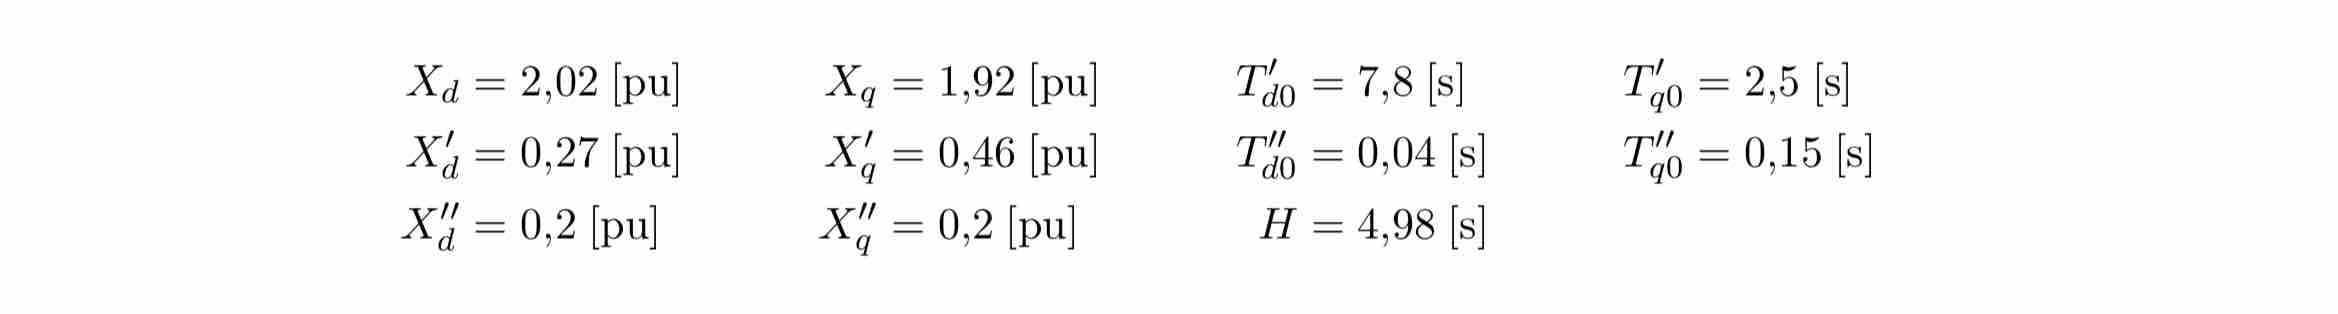
###Assumindo que a máquina opere com potência aparente nominal e fator de potência 0,9 (indutivo) conectada a uma barra infinita com tensão nominal, calcule:


In [2]:
!pip install control

     |████████████████████████████████| 266kB 5.5MB/s 
  Created wheel for control: filename=control-0.8.4-py2.py3-none-any.whl size=276947 sha256=6bea76cc97caf36279d26149f7cfa04fe0f4dae27c16b3a6255da02f2941a6b3
  Stored in directory: /root/.cache/pip/wheels/3e/a4/9a/8b6ad43fcb2aba7debf8188b60a3def7aaa9a11582b7929ead
Successfully built control


In [30]:
!pip install plotly

In [31]:
# 1º bloco de código para importar bibliotecas e declarar as variáveis do caso em análise:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.precision", 4)
import math
import cmath


# Dados da máquina:
Sb = 144.6    # [MVA]
Vb = 18       # [kV]
f  = 60        # [Hz]
fp = 0.9

# Reatâncias dos eixos direto e em quadratura
Xd = 2.02
X1d = 0.27
X2d = 0.2
Xq = 1.92
X1q = 0.46
X2q = 0.2

# Constantes de tempo de circuito aberto, em segundos
T1d0 = 7.8
T2d0 = 0.04
T1q0 = 2.5
T2q0 = 0.15

# Constante de inércia do eixo [s]
H = 4.98   

# Constante de amortecimento [pu]
D = 0

# Resistência de armadura
Ra = 0

# Velocidade de rotação
wb = 2*np.pi*f 


###(a) Corrente de armadura, tensão interna e ângulo de carga da máquina em regime permanente:

####Embasamento Teórico:
Primeiramente, analisa-se o circuito equivalente da máquina em regime permanente:



*Imagem retirada das notas de aula do prof Marcelo Tomim*

Inicialmente, calcula-se a relação entre as potências da máquina. De posse da potencia aparente e do fator de potência, fica viabilizado o uso do triângulo de potências para o cálculo daquelas ativa e reativa.

>Assim, pode-se lançar mão das seguites relações matemáticas:

$S = P + jQ$ ; $fp = 0,9 = cos(θ)$

>Das relações trigonométricas, tem-se também:

$P=S_b \cdot cos(\theta) $ ; $Q=S_b \cdot sin(\theta)$

>Em valores por unidade:

$P_{pu}= \frac{P}{S_b}$ ; $Q_{pu}= \frac{Q}{S_b}$

>A corrente de armadura pode ser calculada pela relação:

$I_a = (\frac{S}{V_t})^* = (\frac{P_{pu}+jQ_{pu}}{V_t})^* = (\frac{P_{pu}-jQ_{pu}}{V_t})$
, onde Vterminal = 1pu.


> O ângulo de carga da máquina em regime permanente é aquele referente à tensâo $E_q$, tal ângulo (definido como "**δ**") determina o posicionamento entre o eixo de quadatura e a referência, graças ao fato desse eixo estar em fase com a tensão $E_q$.

> O ângulo $δ$ pode ser encontrado pela resolução da malha do circuito equivalente visto anteriormente, assim define-se a equação abaixo para a tensao $E_q$, em módulo e fase:

$Ê_q=V_t+jX_q*Î_a-r_a*Î_a$ 

>A tensão interna $E_a$ pode também ser encontrada a partir da equação de malha do circuito equivalente para o regime permanente:

$Ê_a=Ê_q+j(X_d-X_q)*Î_d$




In [4]:
# Início dos cálculos
#Primeiramente, encotra-se a corrente Ia
vt = 1                   #Tensão terminal(nominal)
theta = math.acos(fp) 
P = Sb*math.cos(theta)   #Pot ativa
Ppu = P/Sb               #Pot ativa em pu
Q = Sb*math.sin(theta)   #Pot reativa 
Qpu = Q/Sb               #Pot reativa em pu
S = complex(Ppu,Qpu)     #Pot Aparente em Pu 

#Cálculo da Corrente Ia:
Ia = (complex.conjugate(S)/vt)
Ia

(0.8999999999999999-0.4358898943540673j)

>**Com isso, a corrente de armadura é aproximadamente: $I_a=0,9-j0.436$ [pu]**





In [5]:
#Nesse segundo bloco de código, encontra-se o ângulo δ

Eq = vt + (complex(0,Xq)*Ia) - Ra*Ia 
cmath.polar(complex(Eq))          #tensão Eq com módulo e fase


(2.521947103790961, 0.7548574829844482)

Assim, $E_q=2,522pu$ e $\delta=0,755 rad$


In [6]:
#Transforma-se o ângulo de carga para graus, fazendo:
delta = (0.7548574829844482*180)/np.pi
delta

43.25014790887723

>**Logo, o ângulo de carga da máquina é $\delta=43,25º$**

In [7]:
#O cálculo da Tensão interna vem do equacionamento do circuito como sugerido na teoria acima

Ea = Eq + complex(0,Xd-Xq)#*Id
Ea

(1.8369085971598091+1.8279999999999998j)

###(b) Corrente de armadura nos eixos direto e em quadratura em regime permanente.

####Embasamento Teórico:
>A corrente armadura levada ao referencial $dq$ pela relação: 

$I_a^{qd}=I_a \times e^{-j\theta}$, tal que  $\theta$ é genericamente o ângulo de $Eq$

>A partir da análise do diagrama fasorial da carga indutiva, nota-se a decomposição da corrente $Ia$ em duas componente:

*   $I_d$, parte real de $I_a$ em sua forma retangular, com fase $-90º$;
*   $I_q$, parte imaginária de $I_a$ também no fomrmato retangular e fase $0º$.

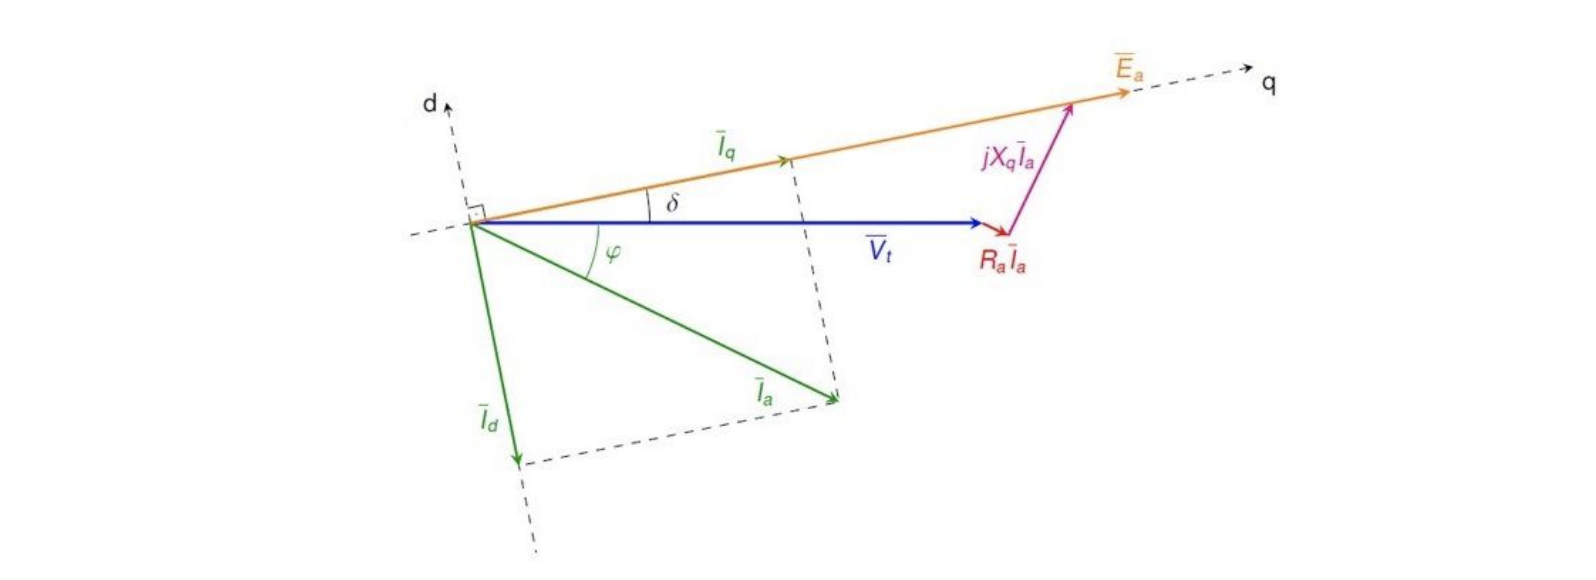

*diagrama retirado das notas de aula do prof. Marcelo A. Tomim*

In [8]:
#desse modo tem-se:
Iq = Ia.real
Iq                   #fase -90gr

0.8999999999999999

In [9]:
Id = Ia.imag
Id

-0.4358898943540673

In [10]:
cmath.polar(Ia)
#print (cmath.rect(0.9 - 0.4359j)) #= 0.9 − 0.4359i
cmath.rect(0.9,42.31)

(-0.09119396632188462-0.895367891152281j)

###(c) Tensão terminal nos eixos direto e em quadratura em regime permanente.
#### Embasamento teórico

> Inicia-se decompondo o $V_t$ com o auxilio do angulo de carga ($\delta$), dessa forma obtêm-se $V_q$ e $V_d$. Para $\delta=43,35º$, tem-se em $[pu]$:



*   $V_q=V_t\cdot cos(\delta)$
*   $V_d=V_t\cdot sin(\delta)$





In [20]:
##Cálculo das tensões terminais em regime permanente:

#Tensão terminal no eixo em quadratura:
Vq = vt * math.cos(delta)

##Tensão terminal no eixo direto:
Vd = vt * math.sin(delta)

print("Tensão terminal no eixo em quadratura é: %s pu. A tensão terminal no eixo direto é: %s pu" % (Vq, Vd))



Tensão terminal no eixo em quadratura é: 0.7437394185652849 pu. A tensão terminal no eixo direto é: -0.6684696532170866 pu


###(d) Tensão transitória nos eixos direto e em quadratura em regime permanente.
#### Embasamento teórico:

Calcula-se as tensões transitórias, utilizando o seguinte equacionamento matemático:



*   $E'_d=-I_q(X_q-X'_q)$
*   $E'_q=E_a+I_d(X_d-X'_d)$




In [26]:
#Tensão transitória no eixo direto em regime permanente:
E1d = -Iq * (Xq-X1q)
print("E'd = ", E1d)

#Tensão transitória no eixo em quadratura em regime permanente:
E1q = Ea + Id*(Xd-X1d)
print("E'q = ", E1q)

E'd =  -1.3139999999999998
E'q =  (1.0741012820401914+1.8279999999999998j)


###(e) Compare as características de potência elétrica em função do ângulo de carga para os regimes permanente e transitório.

#### Embasamento teórico:
>Primeiramente as potências elétricas serão expressas como:


*   Em regime transitório: $P'_e=\frac {Vt.E'_d}{X'_q}cos(\delta) + \frac {Vt.E'_q}{X'_d}sin(\delta) - \frac{V_t^2}{2}(\frac{1}{X'_d}-\frac{1}{X'_q})sin(2\delta)$
*   Em regime permanente: $P_e=\frac{V_t.E_a}{X'_q}sin(\delta)- \frac{V_t^2}{2}(\frac{1}{X_d}-\frac{1}{X_q})sin(2\delta)$


Do gráfico abaixo, tira-se algumas conclusões:

*  Ocorre um cruzamento entre as potências justamente no ponto onde a máquina está despachada, aproximadamente em $0,95pu$;

*  Como $X'_q > X'_d$, o pico para a potência do período transitório ocorre para valores maiores de $90º$, neste caso próximo de $120º$.;

*  Pode-se notar a disparidade entre os máximos valores de potência transitórias e permanente, enquanto o pico da primeira quase alcança os $5pu$, a segunda nao chega a $1,5pu$;

* Como conclusão, a capacidade de frenagem da máquina durante o período transitório é bem superior à do periodo permanente, tal fato contribui para o correto funcionamento da máquina síncrona na rede elétrica.


In [33]:
# Potência elétrica em regime transitório:
P1e = (vt*E1d/X1q)*math.cos(delta) + (vt*E1q/X1d)*math.sin(delta) - (vt**2/2)*((1/X1d)-(1/X1q))*math.sin(2*delta)

# Potência elétrica em regime permanente:
Pe = (vt*Ea/X1q)*math.sin(delta) - (vt**2/2)*((1/Xd)-(1/Xq))*math.sin(2*delta)

# Criando gráfico com as potências calculadas acima


###(f) Determine as equações diferenciais que permitam a análise dessa má ́quina no seu período transitório. Inclua as condições iniciais apropriadas para as variáveis de estado consideradas.


###(g) Estime o tempo crítico de abertura de um curto-circuito trifásico franco nos terminais dessa máquina.